## Import the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### importing our dataset.

In [128]:
Data = pd.read_csv('Heart_Disease_Prediction.csv')

print( 'Shape of DataFrame:', Data.shape)

Shape of DataFrame: (270, 14)


### checking first five rows

In [130]:
Data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### checking last five rows

In [131]:
Data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [132]:
Data.columns = ['Age','Sex','Chest_pain_type', 'Blood_pressure','Cholesterol','Fasting_blood_sugar_over_120','EKG_results',
'Max_heart_rate_achieved','Exercise_angina','ST_depression','Slope_of_ST','Number_of_vessels_fluro',
'Thallium','Heart_disease']
Data['Sex']=Data['Sex'].replace(to_replace=[0,1],
           value=['femal','male'])

Data['Chest_pain_type']=Data['Chest_pain_type'].replace(to_replace=[1,2,3,4],
           value=['TA','ATA','NAP','ASY'])

Data['Heart_disease']=Data['Heart_disease'].replace(to_replace=['Absence','Presence'],
           value=['No heart Disease','Heart Disease'])


### checking for null values

In [134]:
Data.isna().sum()

Age                             0
Sex                             0
Chest_pain_type                 0
Blood_pressure                  0
Cholesterol                     0
Fasting_blood_sugar_over_120    0
EKG_results                     0
Max_heart_rate_achieved         0
Exercise_angina                 0
ST_depression                   0
Slope_of_ST                     0
Number_of_vessels_fluro         0
Thallium                        0
Heart_disease                   0
dtype: int64

### concise summary of our dataset.

In [136]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           270 non-null    int64  
 1   Sex                           270 non-null    object 
 2   Chest_pain_type               270 non-null    object 
 3   Blood_pressure                270 non-null    int64  
 4   Cholesterol                   270 non-null    int64  
 5   Fasting_blood_sugar_over_120  270 non-null    int64  
 6   EKG_results                   270 non-null    int64  
 7   Max_heart_rate_achieved       270 non-null    int64  
 8   Exercise_angina               270 non-null    int64  
 9   ST_depression                 270 non-null    float64
 10  Slope_of_ST                   270 non-null    int64  
 11  Number_of_vessels_fluro       270 non-null    int64  
 12  Thallium                      270 non-null    int64  
 13  Heart

In [144]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Blood_pressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
Fasting_blood_sugar_over_120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG_results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max_heart_rate_achieved,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise_angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST_depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2
Slope_of_ST,270.0,1.585185,0.614390,1.0,1.0,2.0,2.0,3.0
Number_of_vessels_fluro,270.0,0.670370,0.943896,0.0,0.0,0.0,1.0,3.0


### plotting histogram of all numeric values

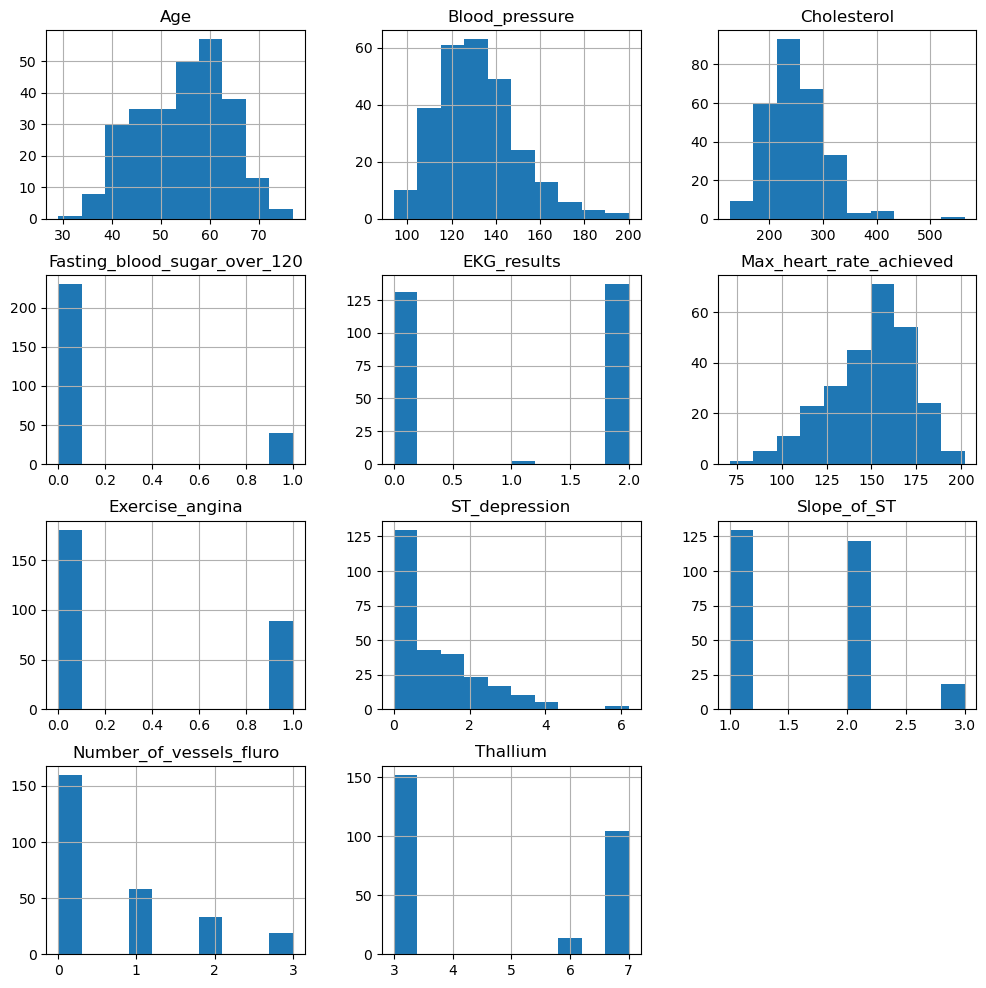

In [137]:
Data.hist(figsize = (12, 12))
plt.show()

## How many people have heart disease and how many people doesn't have heart disease?

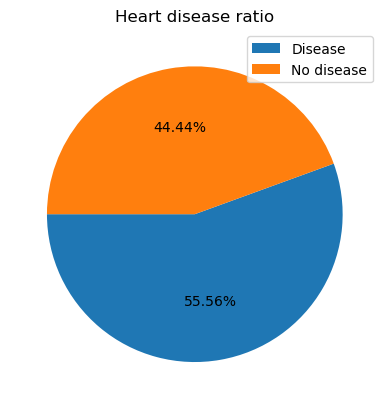

In [151]:
plt.pie(Data.Heart_disease.value_counts(), autopct='%1.2f%%',  startangle=180)
plt.title('Heart disease ratio')
plt.legend(["Disease", "No disease"]);

### In diseased states, we concluded that, from a total of 270 instances,  55.56% patients had a heart disease problem and 44.44% are normal out of the total instances. 

 ## Which sex has most heart disease?

Sex               femal  male
Heart_disease                
Heart Disease        20   100
No heart Disease     67    83


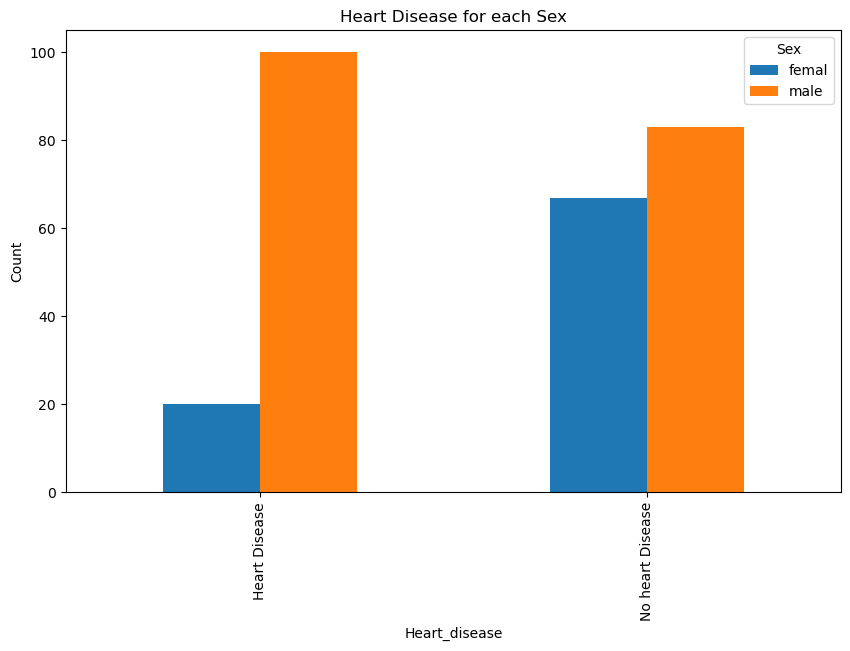

In [169]:
print(pd.crosstab(Data.Heart_disease,Data.Sex))

pd.crosstab(Data.Heart_disease,Data.Sex).plot(kind="bar",figsize=(10,6))
plt.title("Heart Disease for each Sex")
plt.ylabel("Count");

### Rate heart disease in males more than in female

## Which Average Age for sex and heart disease?

Sex                  femal       male
Heart_disease                        
Heart Disease     59.35000  56.040000
No heart Disease  54.58209  51.192771


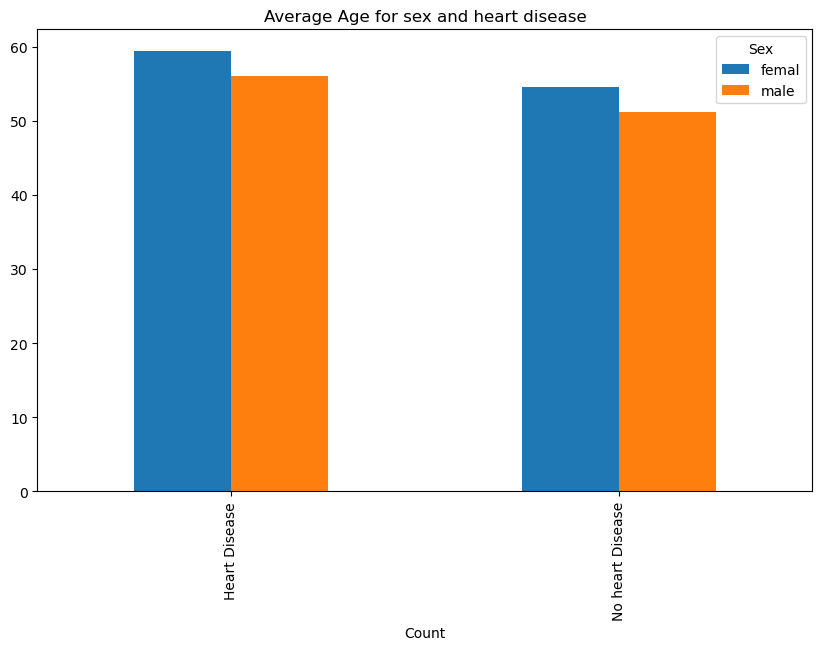

In [175]:
#Average Age
print(pd.crosstab(Data.Heart_disease,Data.Sex,values=Data.Age, aggfunc=np.average))
pd.crosstab(Data.Heart_disease,Data.Sex,values=Data.Age, aggfunc=np.average).plot(kind="bar",figsize=(10,6))
plt.title('Average Age for sex and heart disease')
plt.xlabel('Count');                                                                                                                                                                                 

### Risk of heart disease goes up as you get older

### What type of chest pain is more common in any sex?

Chest_pain_type  ASY  ATA  NAP  TA
Sex                               
femal             18    1    1   0
male              73    6   16   5


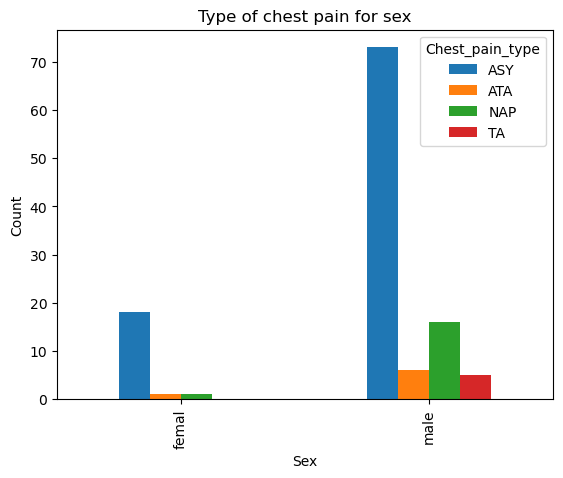

In [184]:
print(pd.crosstab(Data.Sex[Data.Heart_disease=='Heart Disease'], Data.Chest_pain_type[Data.Heart_disease=='Heart Disease']))
pd.crosstab(Data.Sex[Data.Heart_disease=='Heart Disease'], Data.Chest_pain_type[Data.Heart_disease=='Heart Disease']).plot(kind = 'bar')
plt.title('Type of chest pain for sex')
plt.xlabel('Sex');
plt.ylabel('Count');

### ASY type chest pain is popular in male and female 

## When people have heart disease, what is the age vs. maximum heart rate achieved?
## When people do not have heart disease, what is the age vs. maximum heart rate achieved?

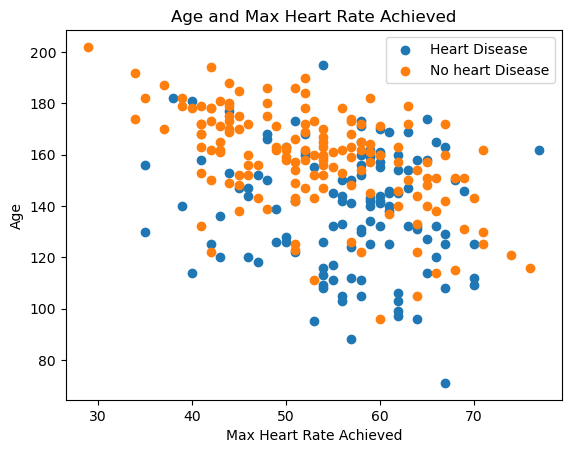

In [188]:
plt.scatter(Data.Max_heart_rate_achieved[Data.Heart_disease=='Heart Disease'],  
            Data.Age[Data.Heart_disease=='Heart Disease']) 
plt.scatter(Data.Max_heart_rate_achieved[Data.Heart_disease=='No heart Disease'], 
            Data.Age[Data.Heart_disease=='No heart Disease']) 

plt.title("Age and Max Heart Rate Achieved")
plt.xlabel("Max Heart Rate Achieved")
plt.ylabel("Age");
plt.legend(["Heart Disease", "No heart Disease"])

### Heart Disease is heartbeat too fast or too slow

### Fasting blood sugar above 120 for both sexes with heart disease

Fasting_blood_sugar_over_120   0   1
Sex                                 
femal                         15   5
male                          88  12


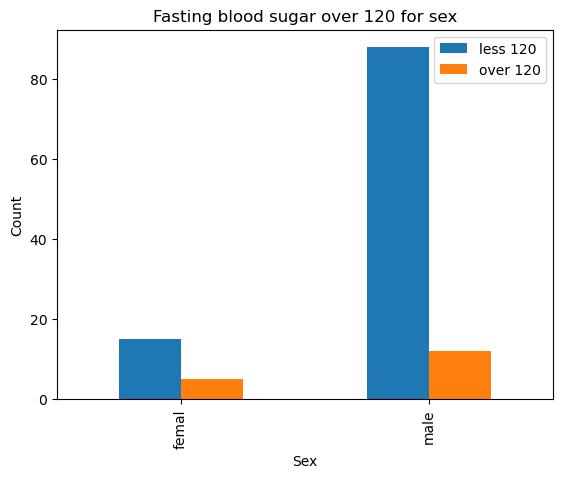

In [193]:
print(pd.crosstab(Data.Sex[Data.Heart_disease=='Heart Disease'], Data.Fasting_blood_sugar_over_120[Data.Heart_disease=='Heart Disease']))
pd.crosstab(Data.Sex[Data.Heart_disease=='Heart Disease'], Data.Fasting_blood_sugar_over_120[Data.Heart_disease=='Heart Disease']).plot(kind = 'bar')
plt.title('Fasting blood sugar over 120 for sex')
plt.xlabel('Sex');
plt.ylabel('Count');  
plt.legend(["less 120", "over 120"]);


### For both sexes with heart disease is less than 120